## 使用 matplotlib 進行資料視覺化
1. 先造出用來放畫布的 figure 
2. 造出用來畫畫的畫布 axe 
3. 畫在畫布 axe 上 
4. 更多細節設定，像是 x, y軸 
5. 顯示 show 出來

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv(r'Orders.csv')

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,...,SalesOrderReceiverId,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef
0,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457777,1242871,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
1,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457778,1242880,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
2,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457779,1242880,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
3,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457780,1175574,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
4,20150703,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457791,1194488,True,False,...,1480896,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN


In [4]:
df['new_DateId'] = pd.to_datetime(df['DateId'].astype(str), format='%Y%m%d')
data = df.groupby(by='new_DateId')['Quantity'].sum().to_frame()
data.reset_index(level=0, inplace=True)
data.head(5)

,new_DateId,Quantity
0,2015-05-06,26
1,2015-05-07,38
2,2015-05-08,61
3,2015-05-09,87
4,2015-05-10,103


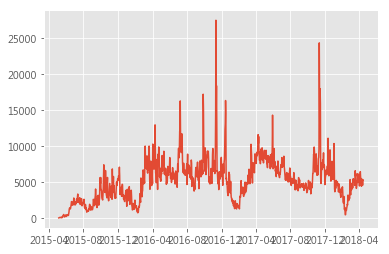

In [5]:
fig, ax = plt.subplots()
ax.plot(data['new_DateId'], data['Quantity'])

## 依照星期幾分類資料並畫圖
1. import datetime() 模塊把日期轉成 星期幾
2. 使用 datetime() 模塊的 weekday() 方法把所有的日期 (new_DateId) 轉成星期幾，並存成新的一個 column (weekday)
3. 用weekday與Quantity作圖

In [6]:
import datetime
data['weekday'] = data['new_DateId'].apply(lambda x: x.weekday())
data.head()

,new_DateId,Quantity,weekday
0,2015-05-06,26,2
1,2015-05-07,38,3
2,2015-05-08,61,4
3,2015-05-09,87,5
4,2015-05-10,103,6


In [7]:
data_weekday = data.groupby(by='weekday')['Quantity'].sum().to_frame()
data_weekday.reset_index(level=0, inplace=True)
data_weekday

,weekday,Quantity
0,0,750079
1,1,827454
2,2,836489
3,3,773765
4,4,743191
5,5,817931
6,6,859920


<BarContainer object of 7 artists>

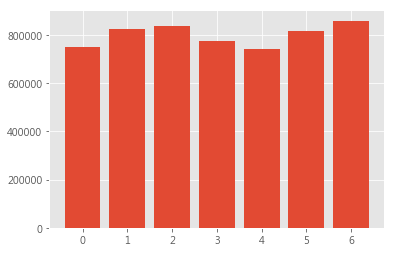

In [8]:
fig, ax = plt.subplots()
ax.bar(data_weekday['weekday'], data_weekday['Quantity'])